## ch3

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right"> Initial upload: 2022.08.09 </div> 
<div style="text-align: right"> Last update: 2022.08.09</div> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import datetime
#import missingno as msno
import gc
import warnings; warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Options for pandas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors)

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216),
 (0.00784313725490196, 0.47058823529411764, 0.6823529411764706),
 (0.9529411764705882, 0.5725490196078431, 0.2),
 (0.6549019607843137, 0.7725490196078432, 0.9215686274509803),
 (0.32941176470588235, 0.8901960784313725, 0.27450980392156865),
 (0.6705882352941176, 0.807843137254902, 0.4549019607843137),
 (0.8392156862745098, 0.6901960784313725, 0.6941176470588235),
 (0.34509803921568627, 0.2235294117647059, 0.10980392156862745),
 (0.803921568627451, 0.8156862745098039, 0.796078431372549),
 (1.0, 0.7019607843137254, 0.5882352941176471),
 (0.4117647058823529, 0.18823529411764706, 0.7647058823529411)]

### 1. 데이터 읽기

In [3]:
df_total = pd.read_csv('lifelog/step_total_merged.csv')
df_youth = pd.read_csv('lifelog/step_youth_merged.csv')
df_adult = pd.read_csv('lifelog/step_adult_merged.csv')
df_eldery = pd.read_csv('lifelog/step_eldery_merged.csv')

In [4]:
display(df_total.head())
display(df_youth.head())
display(df_adult.head())
display(df_eldery.head())

,timestamp,STEP_CNT,users,year,month,day,hour,dayofweek,season,holiday,temp,rain,wind,wind_d,humidity,snow,cloud
0,2022-02-01 00:00:00,13107,528,2022,2,1,0,1,4,1,0.4,1.2,1.8,270,92,1.8,9
1,2022-02-01 01:00:00,9079,322,2022,2,1,1,1,4,1,-0.2,0.0,2.9,250,85,1.8,2
2,2022-02-01 02:00:00,3294,170,2022,2,1,2,1,4,1,-0.9,0.0,2.8,250,74,1.7,7
3,2022-02-01 03:00:00,2705,128,2022,2,1,3,1,4,1,-0.9,0.0,3.6,250,72,1.7,9
4,2022-02-01 04:00:00,1146,78,2022,2,1,4,1,4,1,-1.7,0.0,3.1,270,87,2.0,10


,timestamp,STEP_CNT,users,year,month,day,hour,dayofweek,season,holiday,temp,rain,wind,wind_d,humidity,snow,cloud
0,2022-02-01 00:00:00,627,39,2022,2,1,0,1,4,1,0.4,1.2,1.8,270,92,1.8,9
1,2022-02-01 01:00:00,1378,46,2022,2,1,1,1,4,1,-0.2,0.0,2.9,250,85,1.8,2
2,2022-02-01 02:00:00,237,10,2022,2,1,2,1,4,1,-0.9,0.0,2.8,250,74,1.7,7
3,2022-02-01 03:00:00,209,12,2022,2,1,3,1,4,1,-0.9,0.0,3.6,250,72,1.7,9
4,2022-02-01 04:00:00,21,2,2022,2,1,4,1,4,1,-1.7,0.0,3.1,270,87,2.0,10


,timestamp,STEP_CNT,users,year,month,day,hour,dayofweek,season,holiday,temp,rain,wind,wind_d,humidity,snow,cloud
0,2022-02-01 00:00:00,12166,470,2022,2,1,0,1,4,1,0.4,1.2,1.8,270,92,1.8,9
1,2022-02-01 01:00:00,7530,265,2022,2,1,1,1,4,1,-0.2,0.0,2.9,250,85,1.8,2
2,2022-02-01 02:00:00,2987,156,2022,2,1,2,1,4,1,-0.9,0.0,2.8,250,74,1.7,7
3,2022-02-01 03:00:00,2457,114,2022,2,1,3,1,4,1,-0.9,0.0,3.6,250,72,1.7,9
4,2022-02-01 04:00:00,1108,74,2022,2,1,4,1,4,1,-1.7,0.0,3.1,270,87,2.0,10


,timestamp,STEP_CNT,users,year,month,day,hour,dayofweek,season,holiday,temp,rain,wind,wind_d,humidity,snow,cloud
0,2022-02-01 00:00:00,188,12,2022,2,1,0,1,4,1,0.4,1.2,1.8,270,92,1.8,9
1,2022-02-01 01:00:00,82,6,2022,2,1,1,1,4,1,-0.2,0.0,2.9,250,85,1.8,2
2,2022-02-01 02:00:00,62,3,2022,2,1,2,1,4,1,-0.9,0.0,2.8,250,74,1.7,7
3,2022-02-01 03:00:00,0,0,2022,2,1,3,1,4,1,-0.9,0.0,3.6,250,72,1.7,9
4,2022-02-01 04:00:00,7,1,2022,2,1,4,1,4,1,-1.7,0.0,3.1,270,87,2.0,10


In [5]:
print(df_total.shape)
print(df_youth.shape)
print(df_adult.shape)
print(df_eldery.shape)

(3840, 17)
(3840, 17)
(3840, 17)
(3840, 17)


In [6]:
df_total['timestamp'] = pd.to_datetime(df_total['timestamp'])
df_youth['timestamp'] = pd.to_datetime(df_youth['timestamp'])
df_adult['timestamp'] = pd.to_datetime(df_adult['timestamp'])
df_eldery['timestamp'] = pd.to_datetime(df_eldery['timestamp'])

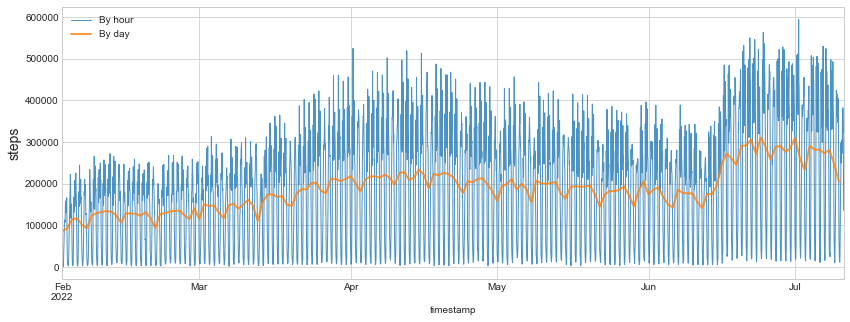

In [7]:
fig, ax = plt.subplots(figsize = (14, 5))
df_total.set_index('timestamp')['STEP_CNT'].plot(ax=ax, label = 'By hour', color='tab:blue', 
                                           alpha = 0.8, linewidth=1).set_ylabel('steps', fontsize= 14)
df_total.set_index('timestamp').resample('D').mean()['STEP_CNT'].plot(ax=ax, label = 'By day', color='tab:orange',
                                        alpha = 0.8, linewidth=2).set_ylabel('steps', fontsize= 14)
ax.legend()

<AxesSubplot:xlabel='timestamp'>

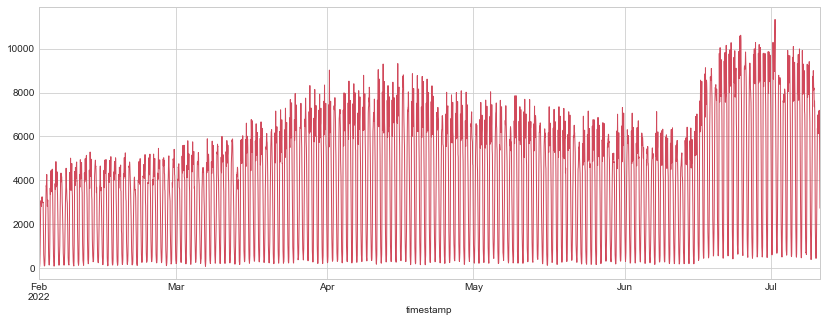

In [8]:
df_total.set_index('timestamp')['users'].plot(figsize=(14, 5), color=colors[1], linewidth=1)

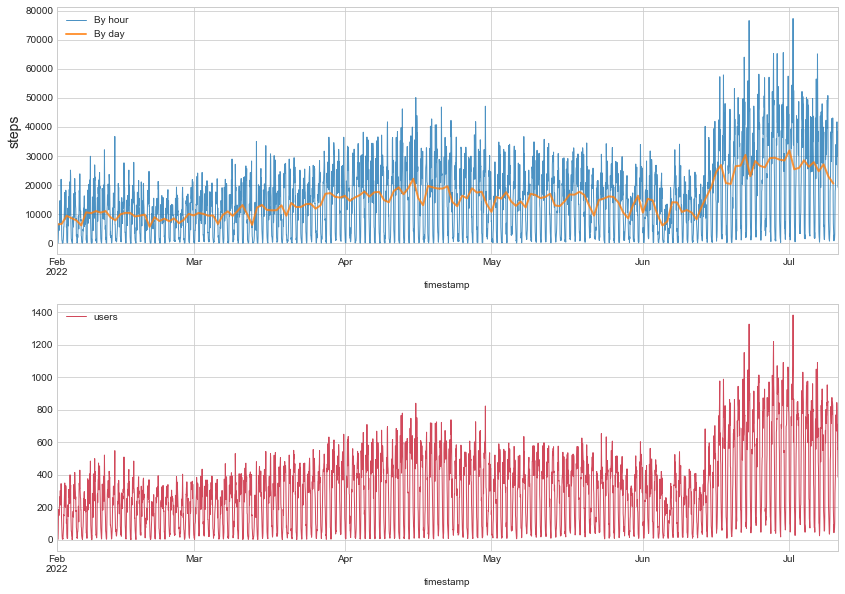

In [12]:
fig, axes = plt.subplots(2, 1, figsize = (14, 10))
df_youth.set_index('timestamp')['STEP_CNT'].plot(ax=axes[0], label = 'By hour', color='tab:blue', 
                                           alpha = 0.8, linewidth=1).set_ylabel('steps', fontsize= 14)
df_youth.set_index('timestamp').resample('D').mean()['STEP_CNT'].plot(ax=axes[0], label = 'By day', color='tab:orange',
                                        alpha = 0.8, linewidth=2).set_ylabel('steps', fontsize= 14)
df_youth.set_index('timestamp')['users'].plot(ax = axes[1], color=colors[1], linewidth=1)
axes[0].legend()
axes[1].legend()

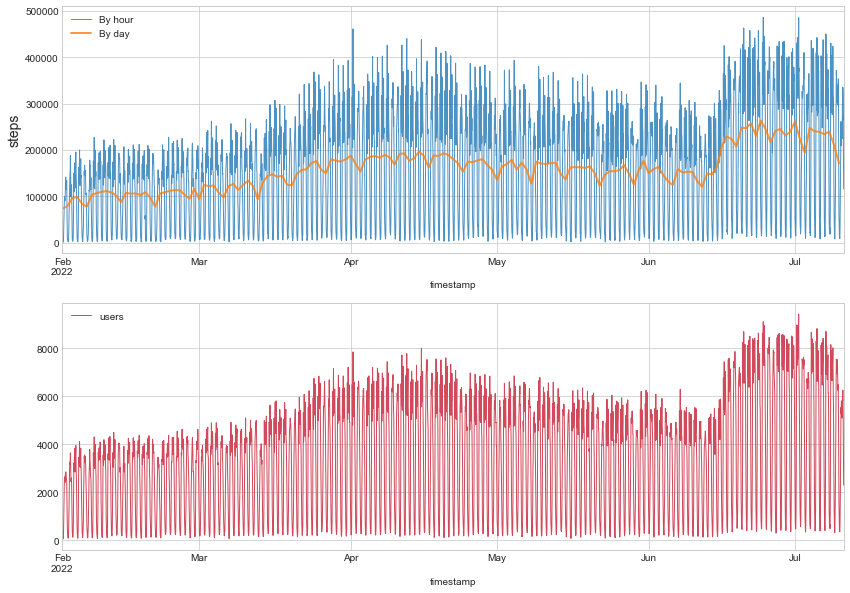

In [13]:
fig, axes = plt.subplots(2, 1, figsize = (14, 10))
df_adult.set_index('timestamp')['STEP_CNT'].plot(ax=axes[0], label = 'By hour', color='tab:blue', 
                                           alpha = 0.8, linewidth=1).set_ylabel('steps', fontsize= 14)
df_adult.set_index('timestamp').resample('D').mean()['STEP_CNT'].plot(ax=axes[0], label = 'By day', color='tab:orange',
                                        alpha = 0.8, linewidth=2).set_ylabel('steps', fontsize= 14)
df_adult.set_index('timestamp')['users'].plot(ax = axes[1], color=colors[1], linewidth=1)
axes[0].legend()
axes[1].legend()

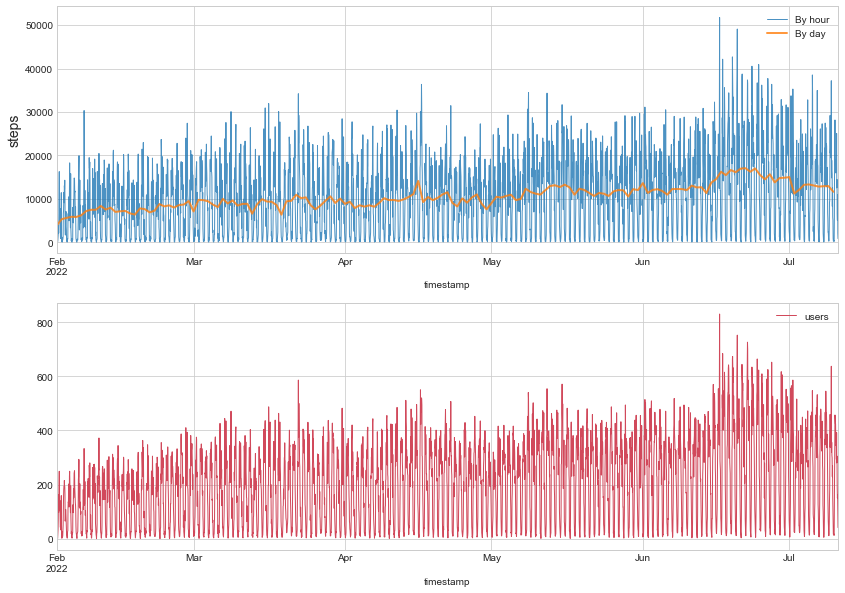

In [14]:
fig, axes = plt.subplots(2, 1, figsize = (14, 10))
df_eldery.set_index('timestamp')['STEP_CNT'].plot(ax=axes[0], label = 'By hour', color='tab:blue', 
                                           alpha = 0.8, linewidth=1).set_ylabel('steps', fontsize= 14)
df_eldery.set_index('timestamp').resample('D').mean()['STEP_CNT'].plot(ax=axes[0], label = 'By day', color='tab:orange',
                                        alpha = 0.8, linewidth=2).set_ylabel('steps', fontsize= 14)
df_eldery.set_index('timestamp')['users'].plot(ax = axes[1], color=colors[1], linewidth=1)
axes[0].legend()
axes[1].legend()

Text(0.5, 1.0, 'Eldery')

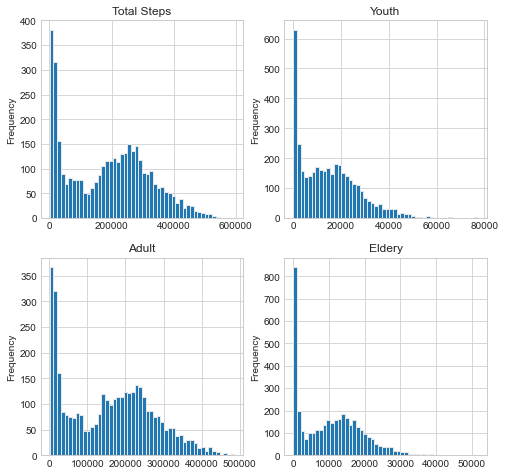

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
df_total['STEP_CNT'].plot(kind ='hist', bins = 50, edgecolor='#E6E6E6', ax = axes[0, 0])
axes[0, 0].set_title('Total Steps')

df_youth['STEP_CNT'].plot(kind ='hist', bins = 50, edgecolor='#E6E6E6', ax = axes[0, 1])
axes[0, 1].set_title('Youth')

df_adult['STEP_CNT'].plot(kind ='hist', bins = 50, edgecolor='#E6E6E6', ax = axes[1, 0])
axes[1, 0].set_title('Adult')

df_eldery['STEP_CNT'].plot(kind ='hist', bins = 50, edgecolor='#E6E6E6', ax = axes[1, 1])
axes[1, 1].set_title('Eldery')

Text(0.5, 1.0, 'Eldery')

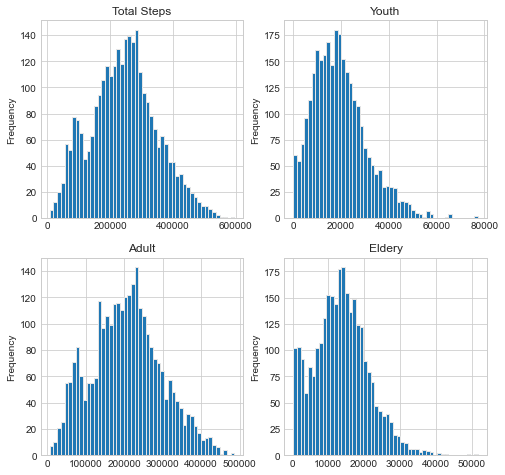

In [27]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
df_total[(df_total['hour']>5)&(df_total['hour']<=23)]['STEP_CNT'].plot(kind ='hist', bins = 50, edgecolor='#E6E6E6', ax = axes[0, 0])
axes[0, 0].set_title('Total Steps')

df_youth[(df_youth['hour']>5)&(df_youth['hour']<=23)]['STEP_CNT'].plot(kind ='hist', bins = 50, edgecolor='#E6E6E6', ax = axes[0, 1])
axes[0, 1].set_title('Youth')

df_adult[(df_adult['hour']>5)&(df_adult['hour']<=23)]['STEP_CNT'].plot(kind ='hist', bins = 50, edgecolor='#E6E6E6', ax = axes[1, 0])
axes[1, 0].set_title('Adult')

df_eldery[(df_eldery['hour']>5)&(df_eldery['hour']<=23)]['STEP_CNT'].plot(kind ='hist', bins = 50, edgecolor='#E6E6E6', ax = axes[1, 1])
axes[1, 1].set_title('Eldery')

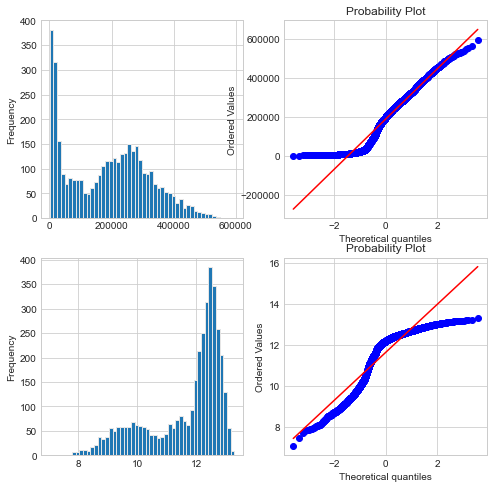

In [30]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
df_total['STEP_CNT'].plot(kind= 'hist', bins = 50, edgecolor='#E6E6E6', ax = axes[0, 0])
np.log1p(df_total['STEP_CNT']).plot(kind= 'hist', bins = 50, edgecolor='#E6E6E6', ax = axes[1, 0])
sp.stats.probplot(df_total['STEP_CNT'], plot= axes[0, 1])
sp.stats.probplot(np.log1p(df_total['STEP_CNT']), plot= axes[1, 1])
plt.show()

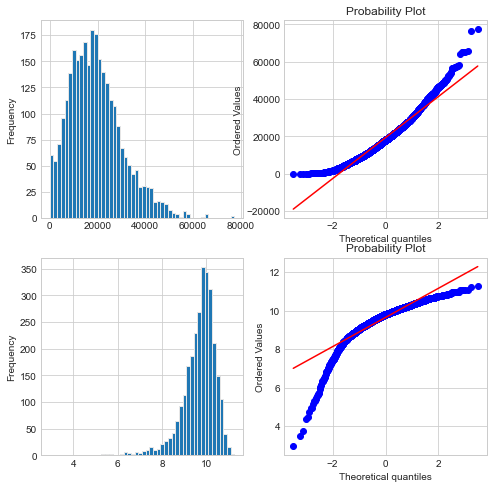

In [33]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
df_youth[(df_youth['hour']>5)&(df_youth['hour']<=23)]['STEP_CNT'].plot(kind= 'hist', bins = 50, edgecolor='#E6E6E6', ax = axes[0, 0])
np.log1p(df_youth[(df_youth['hour']>5)&(df_youth['hour']<=23)]['STEP_CNT']).plot(kind= 'hist', bins = 50, edgecolor='#E6E6E6', ax = axes[1, 0])
sp.stats.probplot(df_youth[(df_youth['hour']>5)&(df_youth['hour']<=23)]['STEP_CNT'], plot= axes[0, 1])
sp.stats.probplot(np.log1p(df_youth[(df_youth['hour']>5)&(df_youth['hour']<=23)]['STEP_CNT']), plot= axes[1, 1])
plt.show()

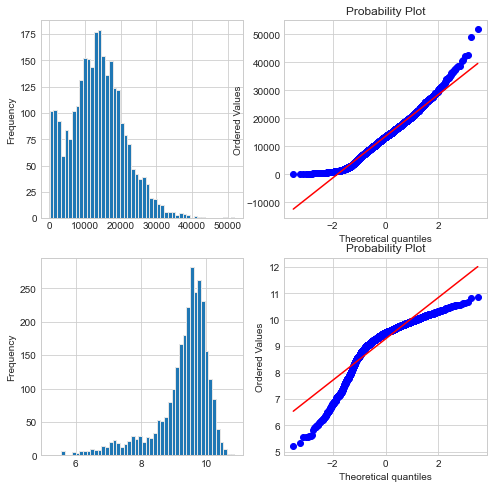

In [34]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
df_eldery[(df_eldery['hour']>5)&(df_eldery['hour']<=23)]['STEP_CNT'].plot(kind= 'hist', bins = 50, edgecolor='#E6E6E6', ax = axes[0, 0])
np.log1p(df_eldery[(df_eldery['hour']>5)&(df_eldery['hour']<=23)]['STEP_CNT']).plot(kind= 'hist', bins = 50, edgecolor='#E6E6E6', ax = axes[1, 0])
sp.stats.probplot(df_eldery[(df_eldery['hour']>5)&(df_eldery['hour']<=23)]['STEP_CNT'], plot= axes[0, 1])
sp.stats.probplot(np.log1p(df_eldery[(df_eldery['hour']>5)&(df_eldery['hour']<=23)]['STEP_CNT']), plot= axes[1, 1])
plt.show()

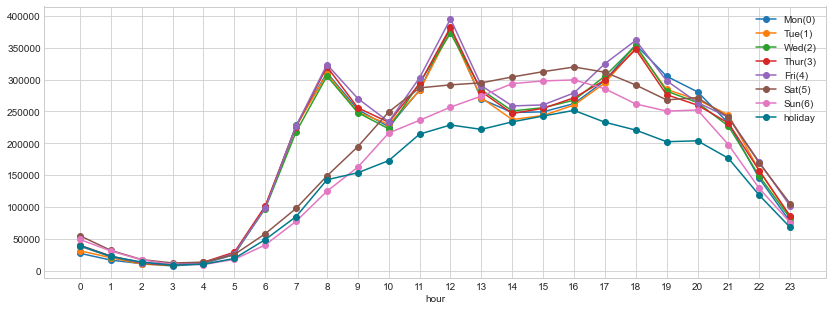

In [35]:
fig, ax = plt.subplots(figsize = (14, 5))
by_weekday_hr = df_total[['hour', 'dayofweek',
                      'STEP_CNT']].groupby(['hour', 'dayofweek'])
by_weekday_hr.mean()['STEP_CNT'].unstack().plot(ax = ax, marker='o')

df_total[df_total['holiday']==1].groupby('hour').mean()['STEP_CNT'].plot(ax = ax, marker='o', color = colors)

ax.set_xticks([i for i in range(0, 24)])
ax.legend(['Mon(0)', 'Tue(1)', 'Wed(2)', 'Thur(3)', 'Fri(4)',
             'Sat(5)', 'Sun(6)', 'holiday'])

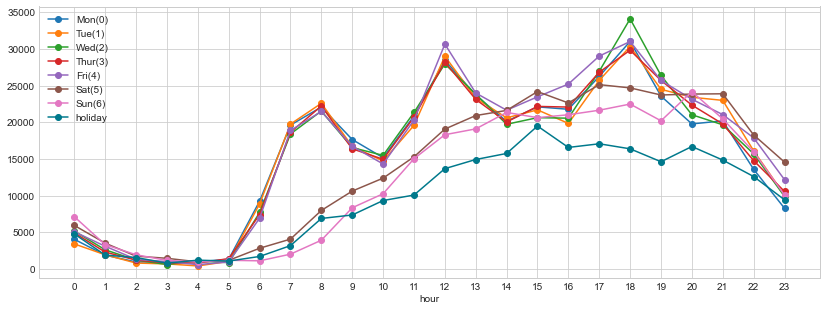

In [36]:
fig, ax = plt.subplots(figsize = (14, 5))
by_weekday_hr = df_youth[['hour', 'dayofweek',
                      'STEP_CNT']].groupby(['hour', 'dayofweek'])
by_weekday_hr.mean()['STEP_CNT'].unstack().plot(ax = ax, marker='o')

df_youth[df_youth['holiday']==1].groupby('hour').mean()['STEP_CNT'].plot(ax = ax, marker='o', color = colors)

ax.set_xticks([i for i in range(0, 24)])
ax.legend(['Mon(0)', 'Tue(1)', 'Wed(2)', 'Thur(3)', 'Fri(4)',
             'Sat(5)', 'Sun(6)', 'holiday'])

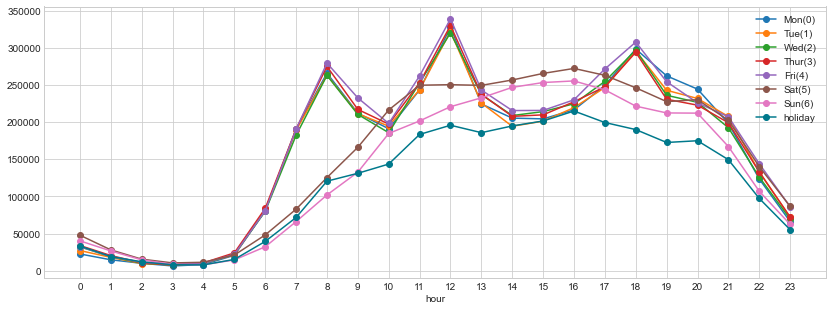

In [37]:
fig, ax = plt.subplots(figsize = (14, 5))
by_weekday_hr = df_adult[['hour', 'dayofweek',
                      'STEP_CNT']].groupby(['hour', 'dayofweek'])
by_weekday_hr.mean()['STEP_CNT'].unstack().plot(ax = ax, marker='o')

df_adult[df_adult['holiday']==1].groupby('hour').mean()['STEP_CNT'].plot(ax = ax, marker='o', color = colors)

ax.set_xticks([i for i in range(0, 24)])
ax.legend(['Mon(0)', 'Tue(1)', 'Wed(2)', 'Thur(3)', 'Fri(4)',
             'Sat(5)', 'Sun(6)', 'holiday'])

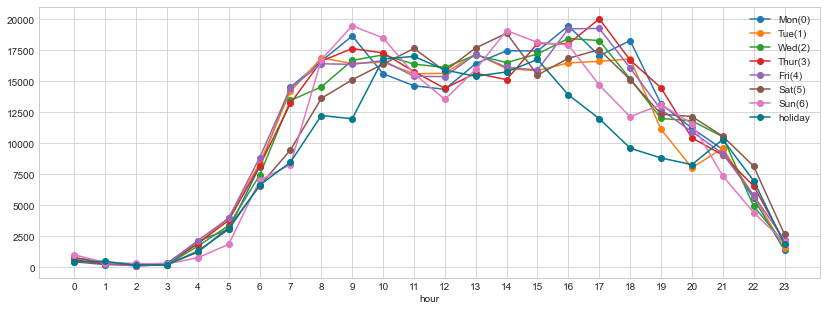

In [38]:
fig, ax = plt.subplots(figsize = (14, 5))
by_weekday_hr = df_eldery[['hour', 'dayofweek',
                      'STEP_CNT']].groupby(['hour', 'dayofweek'])
by_weekday_hr.mean()['STEP_CNT'].unstack().plot(ax = ax, marker='o')

df_eldery[df_eldery['holiday']==1].groupby('hour').mean()['STEP_CNT'].plot(ax = ax, marker='o', color = colors)

ax.set_xticks([i for i in range(0, 24)])
ax.legend(['Mon(0)', 'Tue(1)', 'Wed(2)', 'Thur(3)', 'Fri(4)',
             'Sat(5)', 'Sun(6)', 'holiday'])

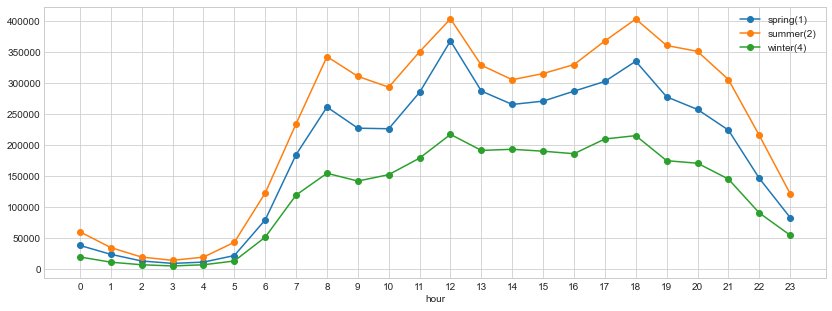

In [39]:
fig, ax = plt.subplots(figsize = (14, 5))
by_weekday_hr = df_total[['hour', 'season',
                      'STEP_CNT']].groupby(['hour', 'season'])
by_weekday_hr.mean()['STEP_CNT'].unstack().plot(ax = ax, marker='o')
ax.set_xticks([i for i in range(0, 24)])
ax.legend(['spring(1)', 'summer(2)', 'winter(4)'])

In [40]:
df_total.columns

Index(['timestamp', 'STEP_CNT', 'users', 'year', 'month', 'day', 'hour',
       'dayofweek', 'season', 'holiday', 'temp', 'rain', 'wind', 'wind_d',
       'humidity', 'snow', 'cloud'],
      dtype='object')

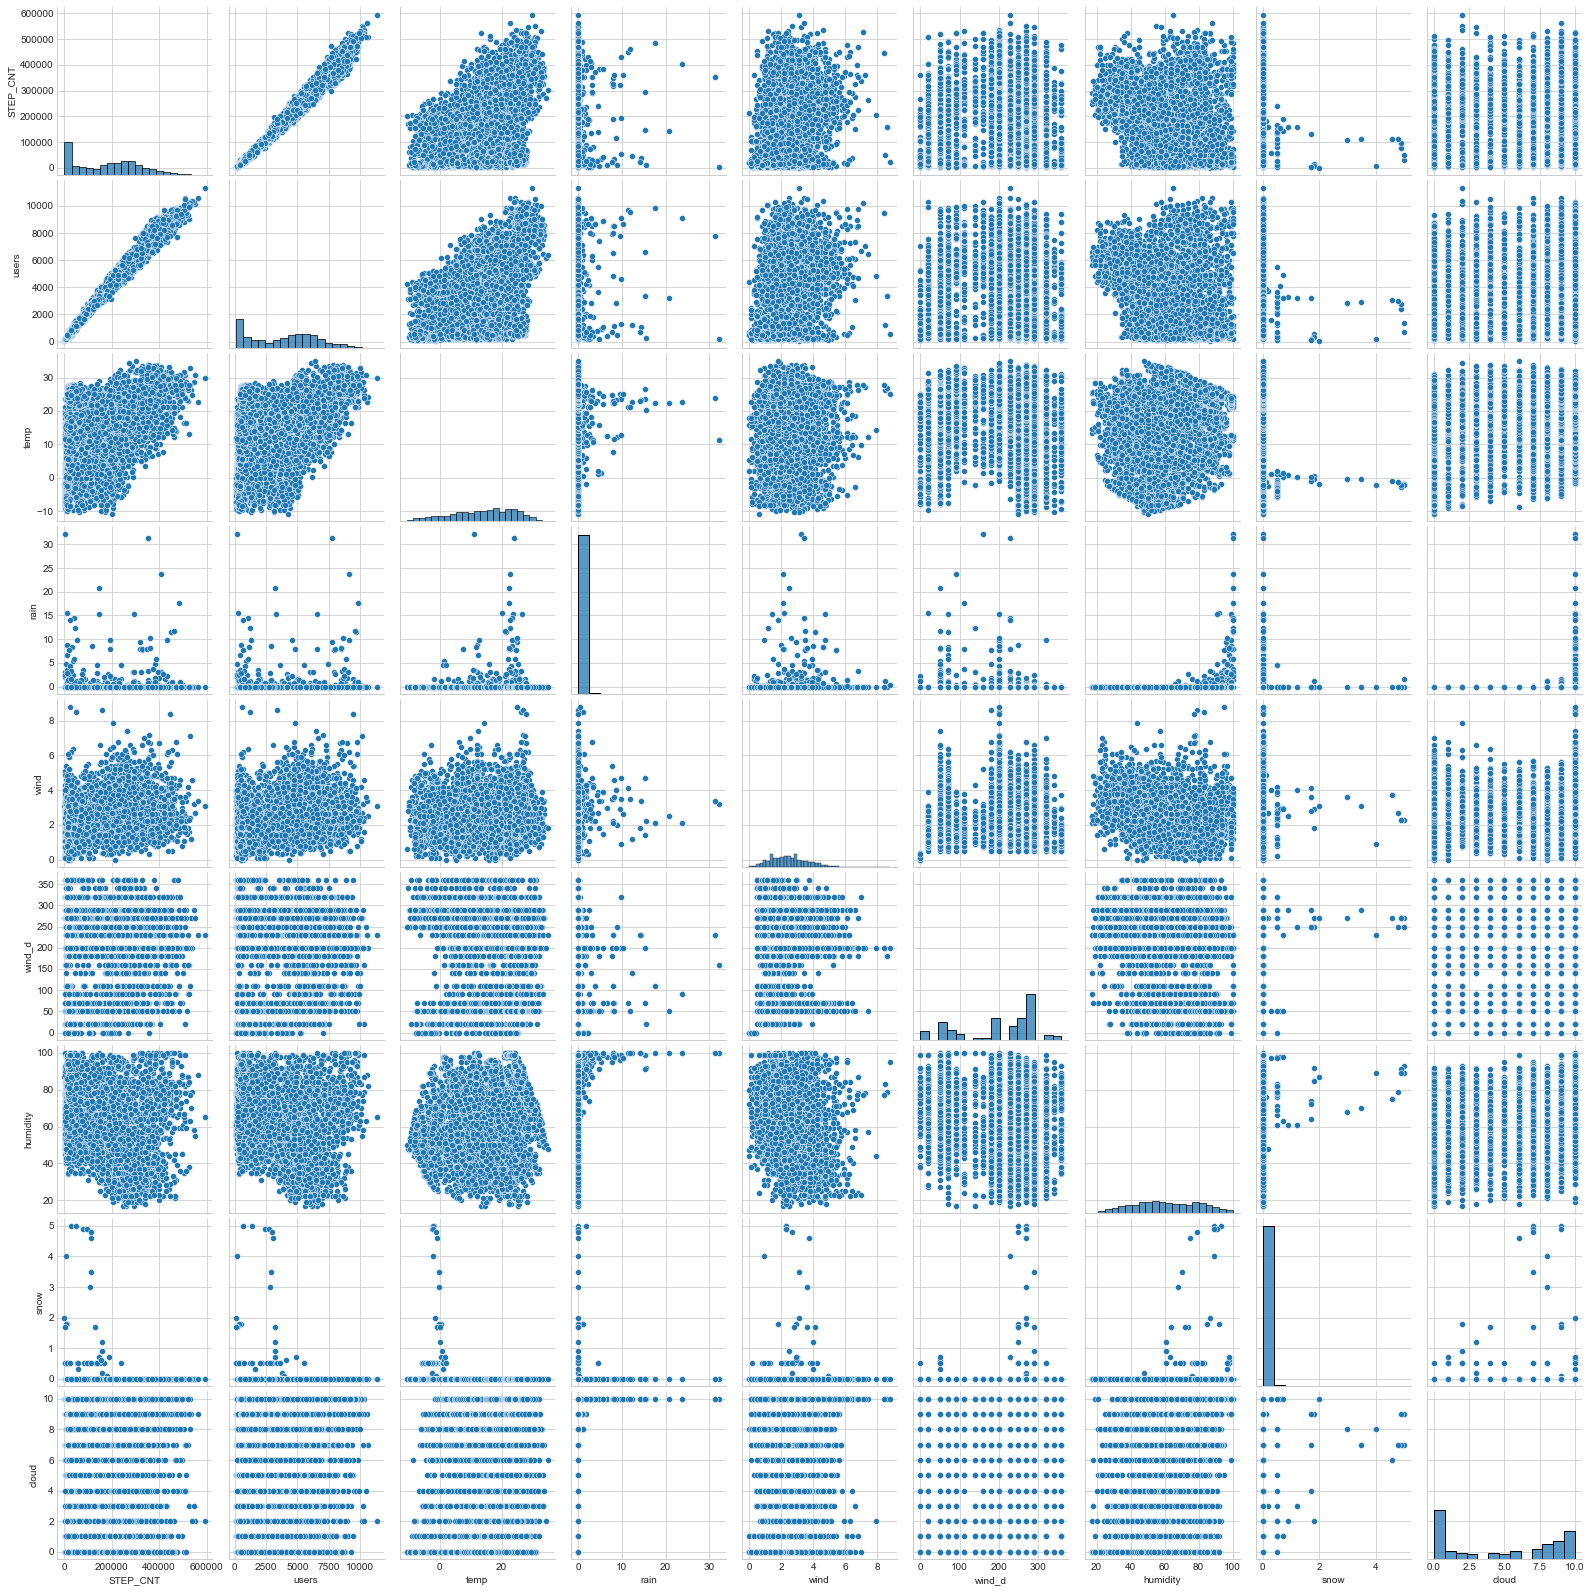

In [41]:
sns.pairplot(df_total[['STEP_CNT', 'users', 'temp', 'rain', 'wind', 'wind_d', 'humidity', 'snow', 'cloud']])

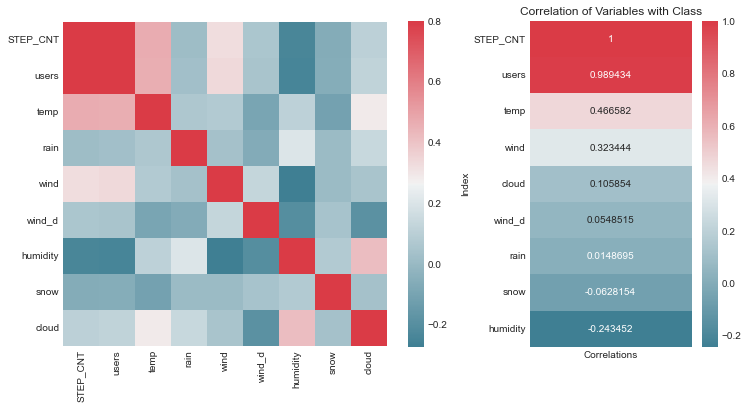

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), gridspec_kw={'width_ratios': [2, 1]})
data = df_total[['STEP_CNT', 'users', 'temp', 'rain', 'wind', 'wind_d', 'humidity', 'snow', 'cloud']]
corr = data.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax = 0.8, square = True, cmap =cmap, ax = axes[0])

corr = data.corrwith(data['STEP_CNT']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
sns.heatmap(corr, annot=True, fmt="g", cmap=cmap, ax = axes[1])
axes[1].set_title("Correlation of Variables with Class", fontsize = 12)
plt.subplots_adjust(wspace = 0.2)
plt.show()